In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
df = pd.read_csv('/Users/aaronjohnson/data_projects/predict-future-sales_20181103/data/_raw/sales_train.csv')

In [3]:
df.shape

(2935849, 6)

In [4]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Importing the data variable description from [kaggle](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data) for convenience.

* **ID** - an Id that represents a (Shop, Item) tuple within the test set
* **shop_id** - unique identifier of a shop
* **item_id** - unique identifier of a product
* **item_category_id** - unique identifier of item category
* **item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure
* **item_price** - current price of an item
* **date** - date in format dd/mm/yyyy
* **date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* **item_name** - name of item
* **shop_name** - name of shop
* **item_category_name** - name of item category

In [20]:
# Make datasize usable
df_sample = df.sample(20000, random_state = 64)

In [31]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 2075509 to 1568187
Data columns (total 6 columns):
date              20000 non-null object
date_block_num    20000 non-null int64
shop_id           20000 non-null int64
item_id           20000 non-null int64
item_price        20000 non-null float64
item_cnt_day      20000 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.1+ MB


In [33]:
# Convert date to datetime

In [35]:

df_sample.date = pd.to_datetime(df_sample.date)

In [36]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 2075509 to 1568187
Data columns (total 6 columns):
date              20000 non-null datetime64[ns]
date_block_num    20000 non-null int64
shop_id           20000 non-null int64
item_id           20000 non-null int64
item_price        20000 non-null float64
item_cnt_day      20000 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.1 MB


## Univariate Analysis

#### item_cnt_day

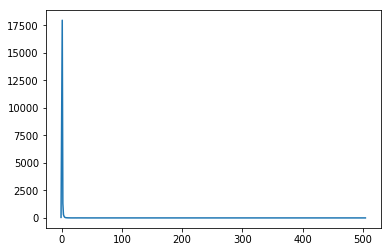

In [23]:
df_sample['item_cnt_day'].value_counts().sort_index().plot.line()

#### item_price

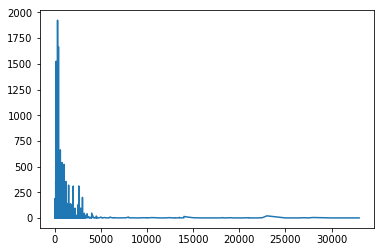

In [24]:
df_sample['item_price'].value_counts().sort_index().plot.line()

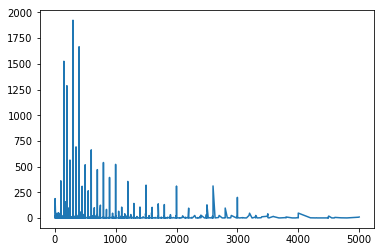

In [29]:
low_price = df_sample[df_sample['item_price'] < 5000]
low_price['item_price'].value_counts().sort_index().plot.line()